# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [98]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [99]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [100]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [101]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


/usr/local/lib/python3.12/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [102]:
model = torch.nn.Linear(28*28, 10)

In [103]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 0.5537, -0.8600,  0.1232, -0.2295,  0.7112,  0.4748,  0.1741,  0.1824,
          0.0595,  0.4632]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [104]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [105]:
epochs = []
losses = []
losses_epoch = []
best_loss_epoch = 100

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = (x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs,(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)
        if loss.data < best_loss_epoch:
           best_loss_epoch = loss.data
    losses_epoch.append(best_loss_epoch)




In [106]:
print('Final loss:', loss.data)

Final loss: tensor(0.3317)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

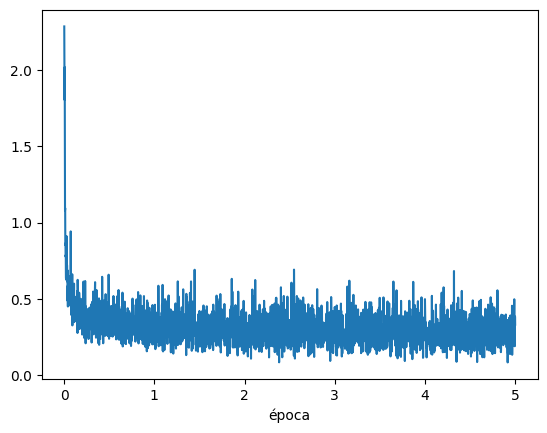

In [107]:
plt.plot(epochs, losses)
plt.xlabel('época')

In [108]:
n_epochs

5

Text(0.5, 0, 'época')

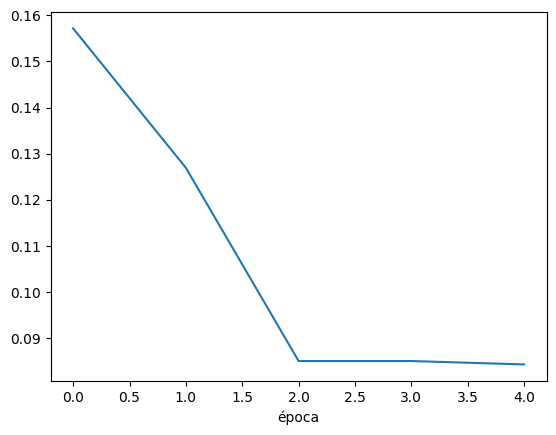

In [109]:
plt.plot(range(n_epochs), losses_epoch)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

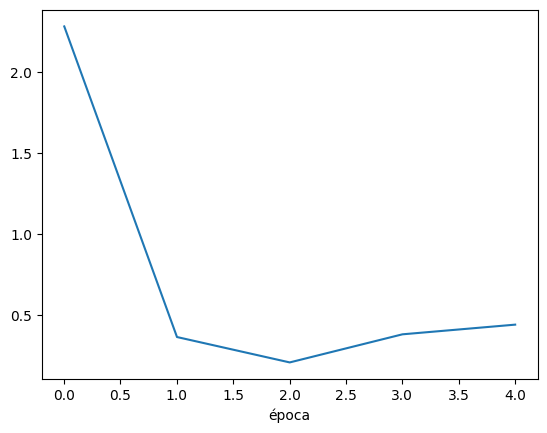

In [110]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?
R - 100
2. Em uma época, quantos mini-batches existem?
R - 600, são 60.000 imagens em 100 mini-batch
3. Qual é a definição de época?
R - Uma Época é uma passagem completa de todo o conjunto de dados de treinamento através do algoritmo de aprendizado.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

In [111]:
batch_size2 = 100
#batch_size2 = 50
#batch_size2 = 200
#batch_size2 = 300

loader_train = DataLoader(dataset_train, batch_size=batch_size2, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


In [112]:
model2 = torch.nn.Linear(28*28, 10)

In [113]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model2.parameters(), lr=learningRate)

In [114]:
epochs = []
losses = []
losses_epoch = []
best_loss_epoch = 100
acc_list = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = (x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model2(inputs)

        # calcula a perda
        loss = criterion(outputs,(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)
        if loss.data < best_loss_epoch:
           best_loss_epoch = loss.data
    losses_epoch.append(best_loss_epoch)
    print('Época[{}/{}],  batch: {}'.format(i+1, n_epochs, k+1))
    # --- CÁLCULO DA ACURÁCIA ADICIONAL ---
    # 1. Obter a classe prevista (índice com a maior pontuação)
    _, predicted = torch.max(outputs.data, 1)

    # 2. Contar as previsões corretas e o total no batch
    total = y_train.size(0)
    correct = (predicted == y_train).sum().item()


    # 3. Calcular e Armazenar/Exibir a acurácia do batch, se necessário
    accuracy_batch = correct / total
    acc_list.append(accuracy_batch)
    print(f"Acurácia do Batch {k+1}: {accuracy_batch:.4f}")
    # --- Fim do Cálculo da Acurácia ---

media_acc = sum(acc_list) / len(acc_list)
print(f"Acurácia Média: {media_acc:.4f}")



Época[1/5],  batch: 600
Acurácia do Batch 600: 0.9000
Época[2/5],  batch: 600
Acurácia do Batch 600: 0.9000
Época[3/5],  batch: 600
Acurácia do Batch 600: 0.9100
Época[4/5],  batch: 600
Acurácia do Batch 600: 0.9100
Época[5/5],  batch: 600
Acurácia do Batch 600: 0.9300
Acurácia Média: 0.9100


Text(0.5, 0, 'época')

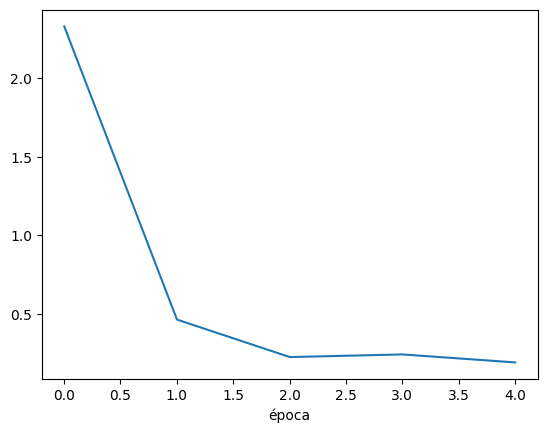

In [115]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

## Conclusões sobre os experimentos deste notebook
